# Prémices du projet de programmation:

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D
import scipy.optimize

# Les paramètres:

N = 67.8 * 10**6     # Taille de la population (ici française) 
e0 = 5970 / N   # Proportion d'exposés au temps t = 0
i0 = 1278 / N     # Proportion d'infectieux au temps t = 0
alpha = 0.25     # 1 / la période d'incubation moyenne   (ici 4 jours)
beta_ = 2.33     # Produit du nombre moyen de contacts par personne et par unité de temps avec la probabilité de maladie transmission lors d'un contact entre un individu sensible et un individu infectieux
gamma = 1     # Taux de transition
brr_ = beta_ / gamma     # Taux de reproduction de base
T = 100     # Horizon de temps en jours

temps = np.linspace(0, T, T + 1)   # Axe des temps

def SEIR(y0, t, alpha, beta, gamma, K):   
  '''Système d'équations SEIR'''     
  # y0 : conditions initiales  
  # t: Axe des temps 
  # alpha, beta, gamma: paramètre du système
  # K: Nb classes de S
  s, e, i, r = y0[: K], y0[-3], y0[-2], y0[-1]
  dydt = np.append(- (beta * s) * i, np.array([(beta.dot(s)) * i - alpha * e, alpha * e - gamma * i, gamma * i]))
  return dydt

# Partie commune du projet: 





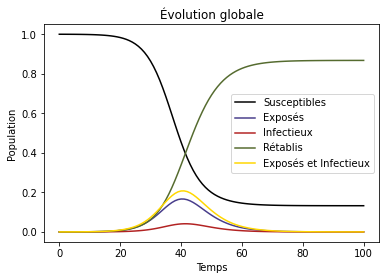

La taille totale de l’épidémie vaut 0.867445452986334 , le pic 0.20748116071490216 et le temps du pic au 41 eme jour.


In [0]:
K = 1     # Nb des classes de S

q = 1     # Facteur de réduction des interactions sociales
brr = brr_ / q     # Nouveau taux de reproduction de base
beta = np.array([beta_ / q])     # Nouveau paramètre beta
r0 =  (e0 + i0) / (brr - 1)     # Proportion de rétablis au temps t = 0
s0 = 1 - brr * r0     # Proportion de susceptibles au temps t = 0

initialisation = np.array([s0, e0, i0, r0])    # Proportions initiales  
solution = odeint(SEIR, initialisation, temps, args=(alpha, beta, gamma, K))     # Résolution du système d'équations par la fonction odeint

zeta = solution[-1][-1]     # Taille totale de l’épidémie
pi = max(solution[:, 1] + solution[:, 2])     # Pic de l’épidémie
tp = temps[np.argmax(solution[:, 1] + solution[:, 2])]     # Temps du pic

# Paramètre du tracé:
plt.plot(temps, solution[:,0], 'black', temps, solution[:,1], 'darkslateblue', temps, solution[:,2], 'firebrick', temps, solution[:,3], 'darkolivegreen', temps, solution[:, 1] + solution[:, 2], 'gold')
plt.legend(["Susceptibles", "Exposés", "Infectieux", "Rétablis", "Exposés et Infectieux"])
plt.xlabel("Temps")
plt.ylabel("Population") 
plt.title("Évolution globale")
plt.show()
# Résultats numériques obtenus:
print("La taille totale de l’épidémie vaut", zeta, ", le pic", pi, "et le temps du pic au", int(tp), "eme jour.")


Évolution du pic épidémique dans le modèle SEIR en fonction du taux de reproduction de base: 

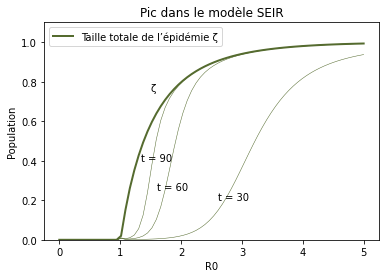

In [0]:
brraxis = np.linspace(0, 5, 70)     # Axe des taux de reproduction de base
t = np.linspace(0, 500, 501)      # Axe des temps, utile pour l'intégration

# Paramètre du tracé:
plt.plot(brraxis, [odeint(SEIR, [1 - brr * (e0 + i0) / (brr - 1), e0, i0, (e0 + i0) / (brr - 1)], t, args=(alpha, np.array([brr]), gamma, 1))[-1][-1] for brr in brraxis], 'darkolivegreen', label = "Taille totale de l’épidémie ζ", linewidth=2)
plt.plot(brraxis, [np.interp(90, t, odeint(SEIR, [1 - brr * (e0 + i0) / (brr - 1), e0, i0, (e0 + i0) / (brr - 1)], t, args=(alpha, np.array([brr]), gamma, 1))[:, -1]) for brr in brraxis], 'darkolivegreen', linewidth=.5)
plt.plot(brraxis, [np.interp(60, t, odeint(SEIR, [1 - brr * (e0 + i0) / (brr - 1), e0, i0, (e0 + i0) / (brr - 1)], t, args=(alpha, np.array([brr]), gamma, 1))[:, -1]) for brr in brraxis], 'darkolivegreen', linewidth=.5)
plt.plot(brraxis, [np.interp(30, t, odeint(SEIR, [1 - brr * (e0 + i0) / (brr - 1), e0, i0, (e0 + i0) / (brr - 1)], t, args=(alpha, np.array([brr]), gamma, 1))[:, -1]) for brr in brraxis], 'darkolivegreen', linewidth=.5)
plt.text(1.5 ,0.75,'ζ')     # Texte sur le tracé
plt.text(1.35, 0.4, 't = 90')
plt.text(1.6, 0.25, 't = 60')
plt.text(2.6, 0.2, 't = 30')
plt.xlabel("R0")
plt.ylabel("Population")
plt.ylim(0, 1.1)
plt.legend()
plt.title('Pic dans le modèle SEIR')
plt.show()

# Partie spécifique du projet : 

Posons pour tout $p = (p_1, ..., p_K)$,$\;$ $$\pi(p) = \max_{t \: \geq \: 0} \:(e_p(t)\: +\: i_p(t))$$

avec $e_p(t)$ la tranche de la population exposée à l'instant $t$ pour les proportions $(p_1, ..., p_K)$ des différentes classes de $s$, et $i_p(t)$ la tranche infectieuse à l'instant $t$.

Notre problème d'optimisation devient: $$\inf_{\sum_{i = 1}^Kp_i \: =\: 1,\: \sum_{i = 1}^Kp_i\beta_i \: =\: \overline{\beta} , \: 0 \: \leq \: p_i \: \leq \: 1} \pi(p)$$
  

La fonction $\pi$ étant minorée par zéro, l’infimum existe et est bien fini.
 
Aussi la continuité de la fonction $\pi$ (que nous n’avons pas pu montrer) nous assure que cet infimum est atteint car  la contrainte est compacte.
 
À priori et numériquement, cela ne change pas grand chose puisque car nous nous contenterons seulement d’une bonne approximation de ce dernier.En effet, par définition nous pourrons nous en approcher aussi précisément que possible sans jamais l’atteindre exactement.



 

In [0]:
def pic(p, K):
  '''fonction qui calcule le pic de l'épidemie en fonction des proportions de chaque groupe'''
  # K : Nombre de classes de S
  # p : Vecteur des proportions des K premières classes    
  beta = np.linspace(beta_ / 10, 10 * beta_, K)
  brr = p.dot(beta) / gamma
  r0 =  (e0 + i0) / (brr - 1)
  s0 = 1 - brr * r0
  s = s0 * p     # Vecteur des proportions de susceptibles au temps t = 0
  initialisation = np.append(s, np.array([e0, i0, r0]))
  solution = odeint(SEIR, initialisation, temps, args=(alpha, beta, gamma, K))     # Résolution du système SEIR par la fonction odeint
  return max(solution[:, -3] + solution[:, -2])     # Pic de l’épidémie

Nous pensons que le paramètre $\overline{\beta}$ joue un rôle important dans notre problème d'optimisation. En effet, nous intuitons que le pic est minimal lorsque la proportion initiale du groupe ayant le plus petit $\beta_k$ est la plus grande possible. À condition bien sûr que la moyenne pondérées par les $p_k$ des $\beta_k$ soit égale à $\overline{\beta}$.

Optimisation dans le cas général: 

In [0]:
K = 10
beta = np.linspace(beta_ / 10, 10 * beta_, K)

# Nous posons les contraintes(lineaires) de notre problème d'optimisation:
A = np.zeros((2,K))
A[0] = np.ones(K)   #somme des p_k egale a  1
A[1] = np.linspace(1 / 10, 10, K)     #la moyenne ponderee des beta_k est egale a beta_bar
u, d = np.ones(2), np.ones(2) # bornes inf et sup des inégalité = 1



*   Optimisation par la fonction optimize.minimize (méthode deterministe) de la librairie scipy :



In [0]:
p0 = np.zeros(K)   # Point de départ 
pi_minimal = scipy.optimize.minimize(pic, p0, args=(K, ),  bounds=[(0, 1) for k in range(K)], constraints=scipy.optimize.LinearConstraint(A, d, u))

# Résultats numériques obtenus:
print('Le pic minimal vaut donc ', pi_minimal.fun, '.', sep='')
print('Il est atteint pour les proportions suivantes: ', pi_minimal.x)
print('Finalement, nous avons bien la moyenne des beta_k valant: ', pi_minimal.x.dot(beta), ', \n et la somme des p_k: ', sum(pi_minimal.x), '.', sep='')

Le pic minimal vaut donc 0.023682590221134614.
Il est atteint pour les proportions suivantes:  [9.09090909e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
 6.93889390e-18 1.04083409e-17 1.73472348e-17 0.00000000e+00
 1.73472348e-17 9.09090909e-02]
Finalement, nous avons bien la moyenne des beta_k valant: 2.330000000000001, 
 et la somme des p_k: 1.0000000000000002.


Effectivement, nous remarquons une proportion relativement élevée du premier groupe dont $\beta_1$ = $\overline{\beta}\: / \:10$. Ce qui confirme ainsi notre intuition.

Aussi, et à priori, la fonction  𝜋  pourrait admettre plusieurs minima locaux.
* Nous proposons alors de vérifier la solution obtenue plus haut en utilisant la fonction differential_evolution (Algorithme à évolution différentielle) de la librairie scipy permettant d'approcher le minimum global :

In [0]:
pi_minimalbis = scipy.optimize.differential_evolution(pic, args=(K, ),  bounds=[(0, 1) for k in range(K)], constraints=scipy.optimize.LinearConstraint(A, d, u))

# Résultats numériques obtenus:
print('Le pic minimal vaut donc ', pi_minimalbis.fun, '.', sep='')
print('Il est atteint pour les proportions suivantes: ', pi_minimalbis.x)
print('Finalement, nous avons bien la moyenne des beta_k valant: ', pi_minimalbis.x.dot(beta), ', \n et la somme des p_k: ', sum(pi_minimalbis.x), '.', sep='')

/usr/local/lib/python3.6/dist-packages/scipy/optimize/_differentialevolution.py:812: UserWarning: differential evolution didn't find a solution satisfying the constraints, attempting to polish from the least infeasible solution
  " infeasible solution", UserWarning)


Le pic minimal vaut donc 0.02394194146234955.
Il est atteint pour les proportions suivantes:  [9.06501758e-01 9.98214557e-04 5.91392664e-04 4.75181578e-04
 4.56882271e-04 4.63510668e-04 5.39068272e-04 6.47845392e-04
 1.27445189e-03 8.80516943e-02]
Finalement, nous avons bien la moyenne des beta_k valant: 2.33, 
 et la somme des p_k: 1.0.


Les résultats de ce dernier algorithme confirment ceux obtenus par la méthode déterministe (plus rapide).

Tracé des solutions du système SEIR dans le cas optimal:



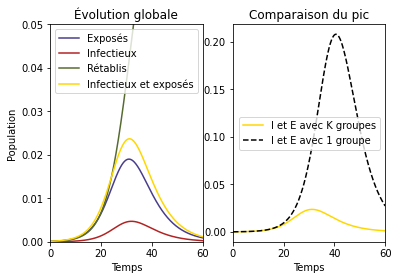

In [0]:
t = np.linspace(0, 500, 5000)     # Axe des temps

# Paramètres 

p = pi_minimal.x     # Proportions optimales
beta = np.linspace(beta_ / 10, 10 * beta_, K)
brr = p.dot(beta) / gamma
r0 =  (e0 + i0) / (brr - 1)
s0 = 1 - brr * r0
s = s0 * p

# Résolution du système d'équations 

initialisation = np.append(s, np.array([e0, i0, r0]))
solution = odeint(SEIR, initialisation, t, args=(alpha, beta, gamma, K))

init = np.array([s0, e0, i0, r0])
sol = odeint(SEIR, init, t, args=(alpha, np.array([p.dot(beta)]), gamma, 1))

# Paramètre du tracé 

plt.subplot(1, 2, 1)
plt.plot(t, solution[:, -3], 'darkslateblue', t, solution[:, -2], 'firebrick', t, solution[:, -1], 'darkolivegreen', t, solution[:, -3] + solution[:, -2], 'gold')
plt.xlim(0, 60)
plt.ylim(0, 0.05)
plt.title("Évolution globale")
plt.xlabel("Temps")
plt.ylabel("Population") 
plt.legend(["Exposés", "Infectieux", "Rétablis", "Infectieux et exposés"])

plt.subplot(1, 2, 2)
plt.plot(t, solution[:, -3] + solution[:, -2], 'gold')
plt.plot(t, sol[:, -3] + sol[:, -2], 'black', linestyle='dashed')     # Vérification du Théorème 2 (cf page 11)
plt.legend(["I et E avec K groupes", "I et E avec 1 groupe"])
plt.xlim(0, 60)
plt.xlabel("Temps")
plt.title("Comparaison du pic")
plt.show()

Nous allons manipuler notre problème dans le but d'en trouver un équivalent que nous pourrons résoudre plus éfficacement.

Considérons alors le problème équivalent suivant: $$\inf_{p_1,\: ..., \: p_{K - 2}} \pi(p_1,\: ..., \: p_{K - 2},\: p_{K - 1},\: p_K)$$

Où $p_{K - 1} =  \frac{10}{11}(K - 1) - \sum_{i = 1}^{K - 2}(K - i)p_i$ et enfin $ p_K = 1 - \sum_{i = 1}^{K - 1}p_i$

Et sous les contraintes :


*   $ 0 \: \leq \: p_i \: \leq \: 1$
 $\forall i \in \{1,..., K-2\}$ 

*   $0 \: \leq \: \frac{10}{11}(K - 1) - \sum_{i = 1}^{K - 2}(K - i)p_i\: \leq \: 1$

*   $ 0 \: \leq \: 1 - \sum_{i = 1}^{K - 1}p_i\: \leq \: 1$



En manipulant les deux dernieres contraintes et en éliminant les inégalités supperflux, nous obtenons les contraintes équivalentes suivantes: $$\sum_{i = 1}^{K - 2}(K - i - 1)p_i\: \: \geq \: \frac{10}{11}(K - 1) - 1\: \: \: \: \: \:(*)$$

$$ \sum_{i = 1}^{K - 2}(K - i)p_i\: \: \leq \: \frac{10}{11}(K - 1) \: \: \: \: \: \:(**)$$

In [0]:
def picbis(p, K):
  '''fonction qui calcule le pic de l'épidemie en fonction des proportions de chaque groupe'''
  # K : Nombre de classes de S
  # p : Vecteur des proportions des K - 2 premières classes
  p_Kmoins1 = 10 * (K - 1) / 11 - sum(np.arange(K - 1, 1, -1) * p)     # La valeure de p_{K-1} est tirée de la contrainte sur la contrainte sur la moyenne probabiliste
  p = np.append(np.append(p, p_Kmoins1), 1 - sum(p) - p_Kmoins1)
  beta = np.linspace(beta_ / 10, 10 * beta_, K)
  brr = p.dot(beta) / gamma
  r0 =  (e0 + i0) / (brr - 1)
  s0 = 1 - brr * r0
  s = s0 * p     # Vecteur des proportions de susceptibles au temps t = 0
  initialisation = np.append(s, np.array([e0, i0, r0]))
  solution = odeint(SEIR, initialisation, temps, args=(alpha, beta, gamma, K))     # Résolution du système SEIR par la fonction odeint
  return max(solution[:, -3] + solution[:, -2])     # Pic de l’épidémie

* Illustration pour K = 3:

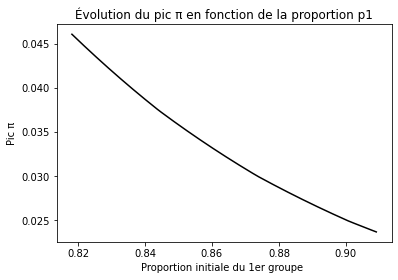

In [0]:
K = 3

lowerbound = (10 * (K - 1) / (11 * (K - 2))) - 1 / (K - 2)
upperbound = 10 / 11

p1axis = np.linspace(lowerbound, upperbound, 400)
picaxis = np.array([picbis(np.array([p1]), K) for p1 in p1axis])
plt.plot(p1axis, picaxis, 'black')
plt.title("Évolution du pic π en fonction de la proportion p1")
plt.xlabel("Proportion initiale du 1er groupe ")
plt.ylabel("Pic π")
plt.show()

* Illustration pour K = 4:

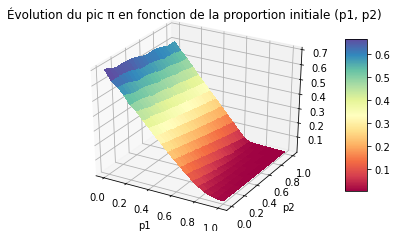

In [0]:
K = 4

p1axis = np.linspace(0, 1, 20)
p2axis = np.linspace(0, 1, 20)
picaxis = np.array([[picbis(np.array([p1, p2]), K) for p1 in p1axis] for p2 in p2axis])
      
p1axis, p2axis = np.meshgrid(p1axis, p2axis)
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(p1axis, p2axis, picaxis, rstride=1, cstride=1, cmap=plt.cm.Spectral, linewidth=0.5, antialiased=False)
fig.colorbar(surf, shrink=.7, aspect=7)
plt.title("Évolution du pic π en fonction de la proportion initiale (p1, p2)")
plt.xlabel("p1")
plt.ylabel("p2")
plt.show()

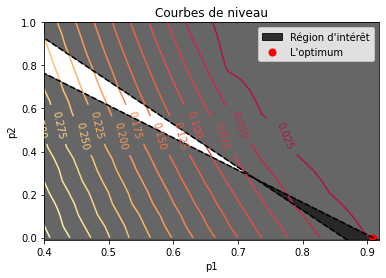

In [0]:
# Paramètre du tracé des courbes de niveau : 

p1 = np.linspace(0, 1, 20)
contrainte1 = 19 / 11 - 2 * p1
contrainte2 = 30 / 22 - 1.5 * p1

plt.plot(p1, contrainte1, p1, contrainte2, linestyle='dashed', color='black')
plt.fill_between(p1, -0.01, contrainte2, alpha=.6, color='black')
plt.fill_between(p1, contrainte1, 1, alpha=.6, color='black')
contour = plt.contour(p1axis, p2axis, picaxis, 30, cmap=plt.cm.Spectral)
plt.ylim(-0.01, 1)
plt.clabel(contour)
plt.xlabel('p1')
plt.ylabel('p2')
plt.title('Courbes de niveau')
plt.fill_between(p1, -0.01, -0.01, alpha=.8, color='black', label='Région d\'intérêt')     # Commande superficielle pour légender 
plt.scatter(10/11, 0, s = 50, color = 'red', label = 'L\'optimum')
plt.legend()
plt.xlim(0.4, 101/110)
plt.show()

Optimisation du nouveau problème dans le cas général: 





In [0]:
K = 10
beta = np.linspace(beta_ / 10, 10 * beta_, K)

# Nous posons les contraintes de notre problème d'optimisation:
A = np.ones((2, K - 2))
A[0], A[1]= np.arange(K - 2, 0, -1), np.arange(K - 1, 1, -1)
d, u = np.zeros(2), np.ones(2)
d[0], u[1] = (10 * (K - 1) / 11) - 1, 10 * (K - 1) / 11
d[1], u[0] = - np.inf, np.inf  

* Optimisation par la fonction optimize.minimize:

In [0]:
p0 = np.zeros(K - 2)   # Point de départ (le pire)
pi_minimal = scipy.optimize.minimize(picbis, p0, args=(K, ),  bounds=[(0, 1) for k in range(K - 2)], constraints=scipy.optimize.LinearConstraint(A, d, u))

p = pi_minimal.x
p_Kmoins1 = 10 * (K - 1) / 11 - sum(np.arange(K - 1, 1, -1) * p)
p = np.append(np.append(p, p_Kmoins1), 1 - sum(p) - p_Kmoins1)

# Résultats numériques obtenus:
print('Le pic minimal vaut donc ', pi_minimal.fun, '.', sep='')
print('Il est atteint pour les proportions suivantes: ', p)
print('Finalement, nous avons bien la moyenne des beta_k valant: ', p.dot(beta), ', \n et la somme des p_k: ', sum(p), '.', sep='')

Le pic minimal vaut donc 0.023682590221135065.
Il est atteint pour les proportions suivantes:  [ 9.09090909e-01  0.00000000e+00  2.16485680e-17  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -3.55271368e-15  9.09090909e-02]
Finalement, nous avons bien la moyenne des beta_k valant: 2.3299999999999996, 
 et la somme des p_k: 1.0.


* Optimisation par la fonction optimize.differential_evolution:

In [0]:
pi_minimalbis = scipy.optimize.differential_evolution(picbis, args=(K, ),  bounds=[(0, 1) for k in range(K - 2)], constraints=scipy.optimize.LinearConstraint(A, d, u))

p = pi_minimalbis.x
p_Kmoins1 = 10 * (K - 1) / 11 - sum(np.arange(K - 1, 1, -1) * p)
p = np.append(np.append(p, p_Kmoins1), 1 - sum(p) - p_Kmoins1)

# Résultats numériques obtenus:
print('Le pic minimal vaut donc ', pi_minimalbis.fun, '.', sep='')
print('Il est atteint pour les proportions suivantes: ', p)
print('Finalement, nous avons bien la moyenne des beta_k valant: ', p.dot(beta), ', \n et la somme des p_k: ', sum(p), '.', sep='')

Le pic minimal vaut donc 0.023705769859638168.
Il est atteint pour les proportions suivantes:  [9.08849545e-01 9.57483132e-05 7.29854180e-07 1.62760822e-04
 9.00649623e-07 1.80486983e-05 5.59242260e-05 6.92269190e-05
 4.16944463e-05 9.07054214e-02]
Finalement, nous avons bien la moyenne des beta_k valant: 2.3300000000000134, 
 et la somme des p_k: 1.0.


Finalement et pour rebondir sur notre première intuition, nous pouvons chercher à résoudre notre problème en maximisant autant que possible et en restant dans la contrainte la proportion $p_1$.
Il s'avère que ceci est possible en prenant $p_1 = \frac{10}{11}$, $\forall K \geq 2$. 

En effet, par (**) nous obtenons que $$(K - 1)p_1 \leq \frac{10}{11}(K - 1).$$

À partir de là, et en utilisant encore une fois (**), nous obtenons que $$ \sum_{i = 2}^{K - 2}(K - i)p_i\: \: \leq \: 0$$
et donc $p_2\: = \:...\: = \: p_{K - 2}\:=\:0$.

Et, $$p_{K - 1} =\: \frac{10}{11}(K - 1) - \sum_{i = 1}^{K - 2}(K - i)p_i = 0.$$
Et enfin, $p_K = 1 - \sum_{i=1}^{K-1} p_i = \frac{1}{11}$

Inversement, on vérifie que $p^* := (\frac{10}{11},0,...,0,\frac{1}{11})$ respecte bien les contraintes.

De cette façon nous obtenons la solution optimale $p^*$ qui est bien en accord avec les résultats numériques obtenus.
